In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.interpolate import make_interp_spline

In [165]:
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)
df,df.isnull().sum(), df.nunique()

(          ID  Duration  Consumption
 0       1002      1.01     0.481127
 1       1002      1.03     0.085061
 2       1002      1.05     0.158161
 3       1002      1.07     0.030569
 4       1002      1.09     0.186071
 ...      ...       ...          ...
 453145  1094    171.91     0.273827
 453146  1094    171.93     0.243249
 453147  1094    171.95     0.240844
 453148  1094    171.97     0.000000
 453149  1094    171.99     0.000000
 
 [453150 rows x 3 columns],
 ID             0
 Duration       0
 Consumption    0
 dtype: int64,
 ID                53
 Duration        8550
 Consumption    73255
 dtype: int64)

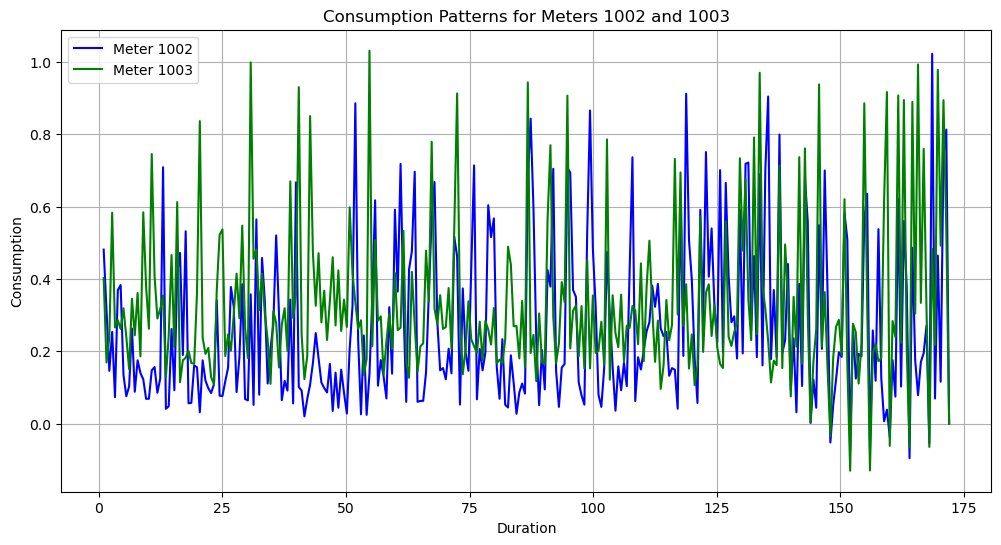

In [7]:
meter_1002_data = df[df['ID'] == 1002]
meter_1003_data = df[df['ID'] == 1003]

# Sort the data by 'Duration' for a smoother curve
meter_1002_data = meter_1002_data.sort_values(by='Duration')
meter_1003_data = meter_1003_data.sort_values(by='Duration')

# Interpolate the data for smoother curves
x1 = meter_1002_data['Duration']
y1 = meter_1002_data['Consumption']
x2 = meter_1003_data['Duration']
y2 = meter_1003_data['Consumption']

x_smooth1 = np.linspace(x1.min(), x1.max(), 300)  # Increase the number of points for smoother curve
y_smooth1 = make_interp_spline(x1, y1)(x_smooth1)
x_smooth2 = np.linspace(x2.min(), x2.max(), 300)  # Increase the number of points for smoother curve
y_smooth2 = make_interp_spline(x2, y2)(x_smooth2)

# Plot the consumption patterns of both meters in a single graph
plt.figure(figsize=(12, 6))
plt.plot(x_smooth1, y_smooth1, label='Meter 1002', linestyle='-', color='b')
plt.plot(x_smooth2, y_smooth2, label='Meter 1003', linestyle='-', color='g')
plt.title('Consumption Patterns for Meters 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()

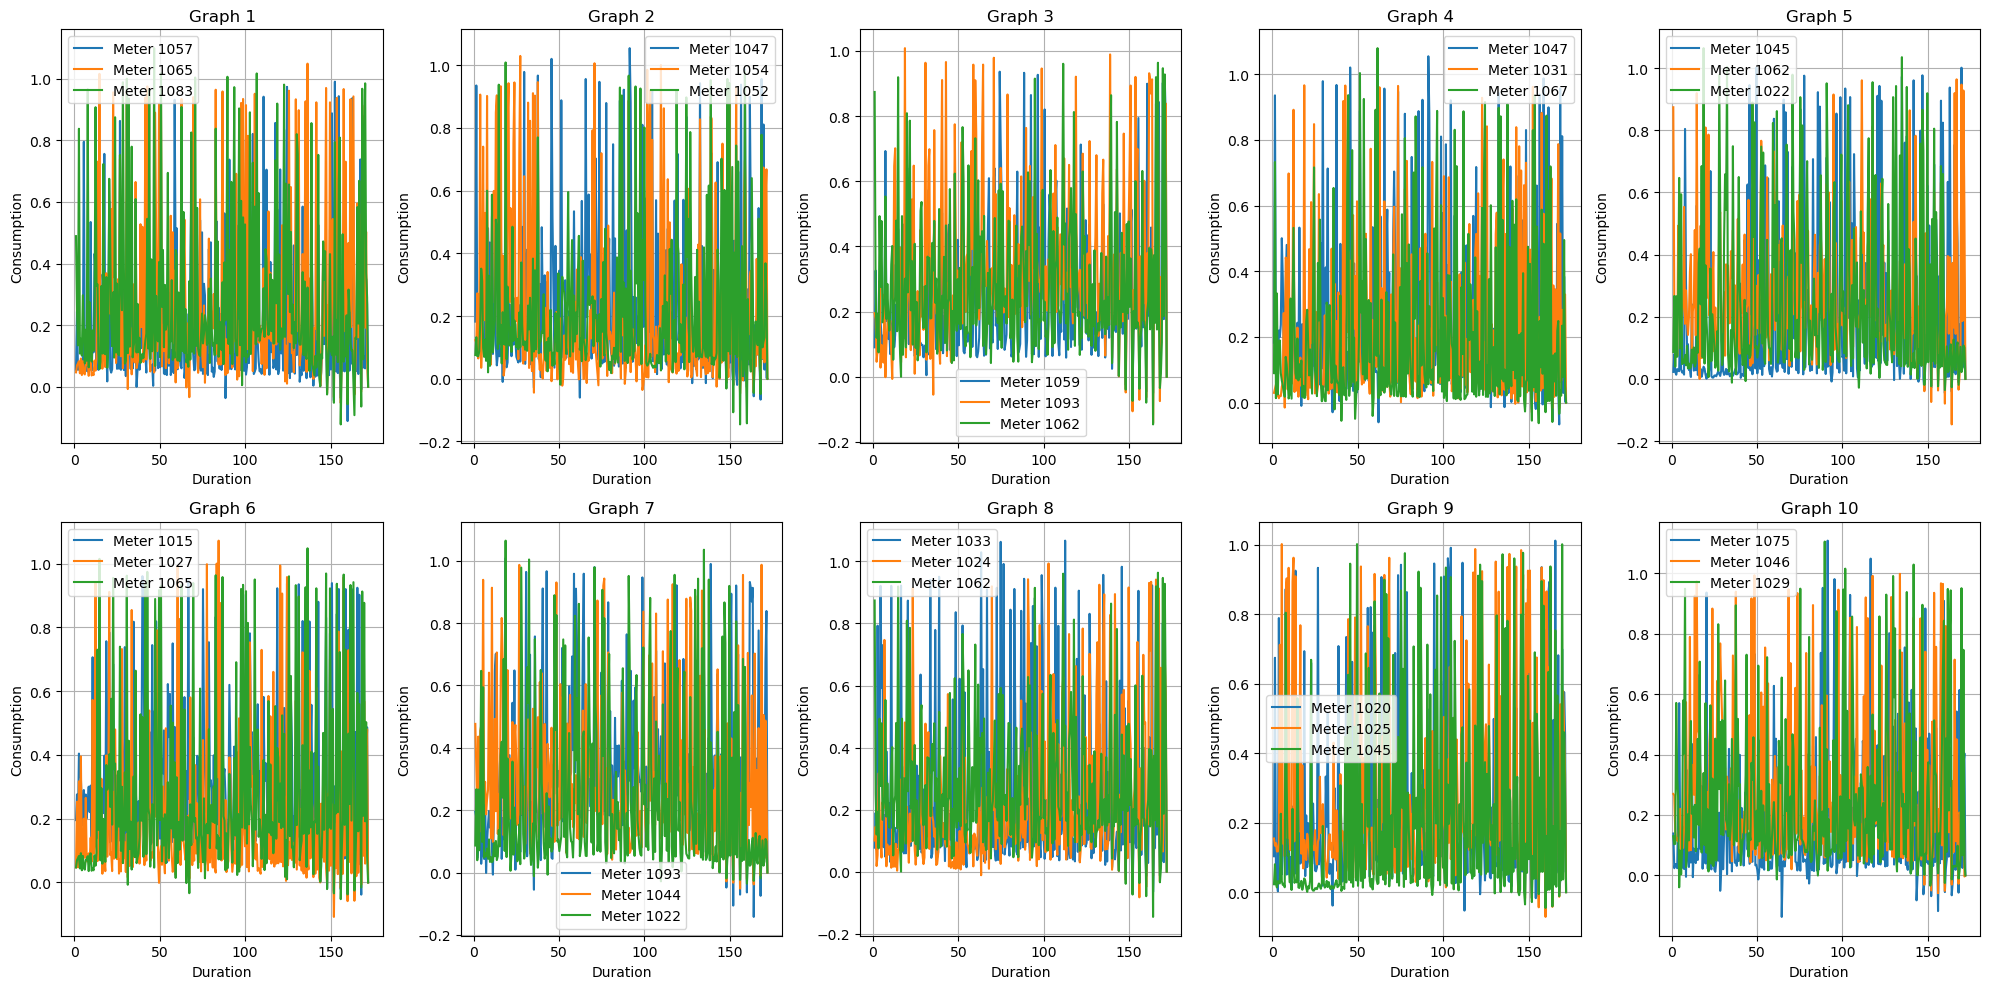

In [8]:
import random

meter_ids = df['ID'].unique()

# Create 10 random combinations of 3 meter IDs
random_meter_combinations = [random.sample(list(meter_ids), 3) for _ in range(10)]

# Create a 2x5 grid of subplots for the 10 graphs
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Iterate through the random meter combinations and plot them
for i, meter_combination in enumerate(random_meter_combinations):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    
    # Plot each meter's consumption pattern in the subplot
    for meter_id in meter_combination:
        meter_data = df[df['ID'] == meter_id]
        meter_data = meter_data.sort_values(by='Duration')
        x = meter_data['Duration']
        y = meter_data['Consumption']
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y)(x_smooth)
        ax.plot(x_smooth, y_smooth, linestyle='-', label=f'Meter {meter_id}')
    
    ax.set_title(f'Graph {i + 1}')
    ax.set_xlabel('Duration')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

## Both duration and consumption is taken as a feature

In [166]:
# meter_1002_data = df[df['ID'] == 1002]
data = df.iloc[0: 10000:]
features = data[['Duration', 'Consumption']]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
# meter_1002_data

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\4029542518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(normalized_features)


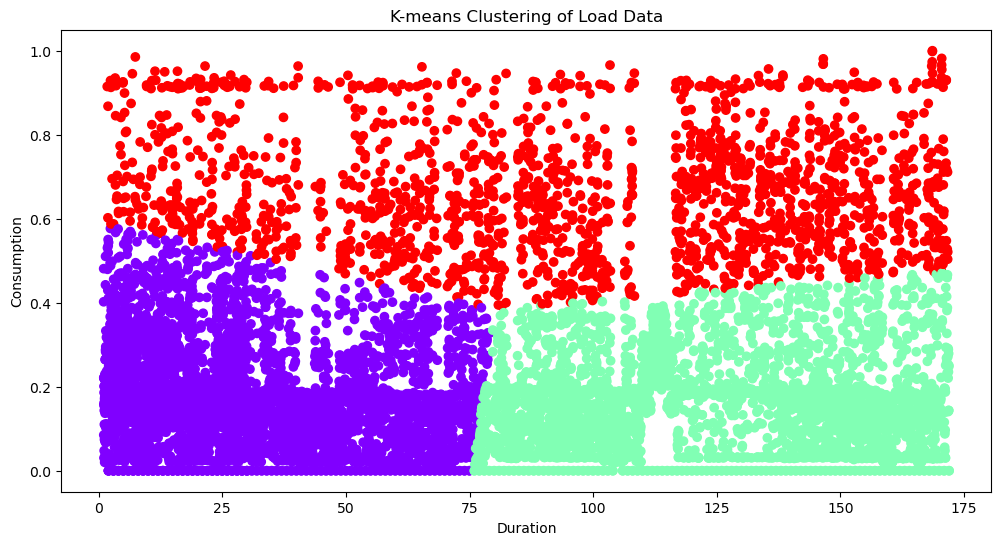

Cluster 1 - Center: [31.32851372  0.1889599 ]
Cluster 2 - Center: [124.15057987   0.16850003]
Cluster 3 - Center: [97.28471128  0.66292801]
Period with Highest Load:
        ID  Duration  Consumption  cluster
0     1002      1.01     0.481127        0
1     1002      1.03     0.085061        0
2     1002      1.05     0.158161        0
3     1002      1.07     0.030569        0
4     1002      1.09     0.186071        0
...    ...       ...          ...      ...
9990  1003     29.81     0.402232        0
9991  1003     29.83     0.430714        0
9992  1003     29.85     0.497559        0
9998  1003     29.97     0.000000        0
9999  1003     29.99     0.000000        0

[4630 rows x 4 columns]
Silhouette Score: 0.4763279509877547


In [167]:
num_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['cluster'] = kmeans.fit_predict(normalized_features)

# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.scatter(data['Duration'], data['Consumption'], c=data['cluster'], cmap='rainbow')
plt.title('K-means Clustering of Load Data')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.show()

# Interpret the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i + 1} - Center: {center}')

# Identify periods with the highest load
highest_load_cluster = data[data['cluster'] == data['cluster'].value_counts().idxmax()]
print("Period with Highest Load:")
print(highest_load_cluster)

silhouette_avg = silhouette_score(normalized_features,data['cluster'] )
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\265865236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(normalized_features)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752

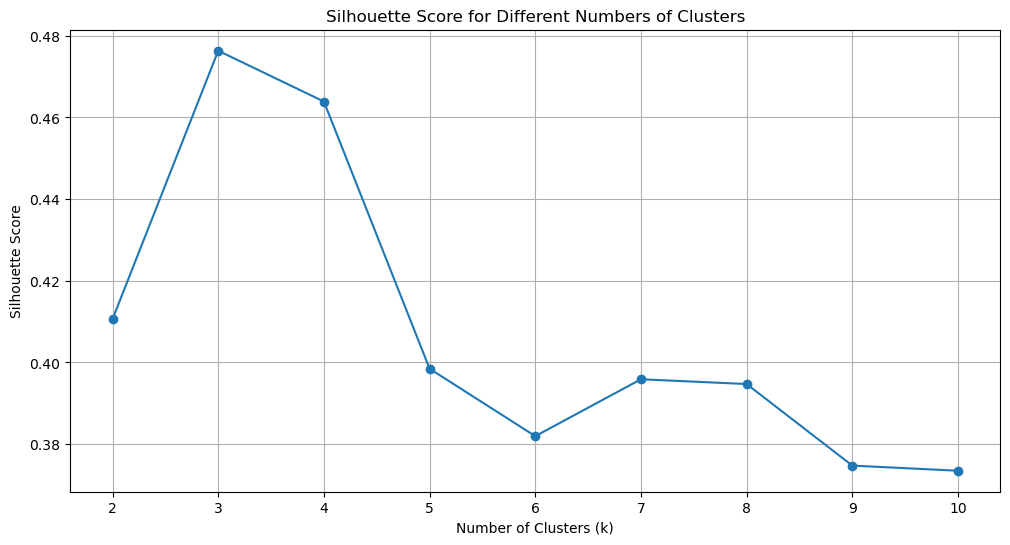

In [168]:
silhouette_scores = []

# Specify a range of cluster numbers (k)
min_clusters = 2
max_clusters = 10

for k in range(min_clusters, max_clusters + 1):
    # Apply K-means clustering for the current k
    kmeans = KMeans(n_clusters=k, random_state=0)
    data['cluster'] = kmeans.fit_predict(normalized_features)

    # Calculate the Silhouette Score for this k
    silhouette_avg = silhouette_score(normalized_features, data['cluster'])
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## only consumption is taken as a feature

In [139]:
##elbow method
wcss = []
df = df.iloc[0: 17100:] #20 meters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['Consumption']])
    wcss.append(kmeans.inertia_)
wcss

[876.3254062378676,
 262.8917964019905,
 128.99206724329906,
 76.4519440506115,
 46.29733428555239,
 30.430022135133655,
 22.12561497946693,
 17.140856593947756,
 12.88123480661869,
 10.09295109743474]

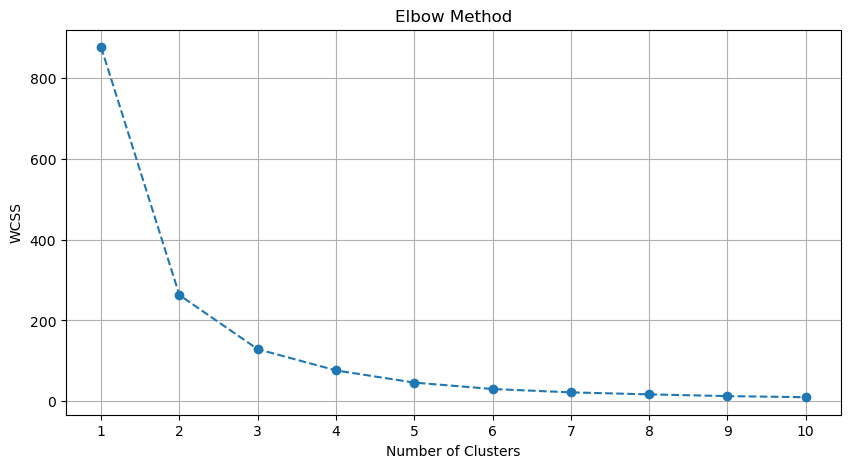

In [140]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xticks(range(1,  11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\1621941683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[['Consumption']])


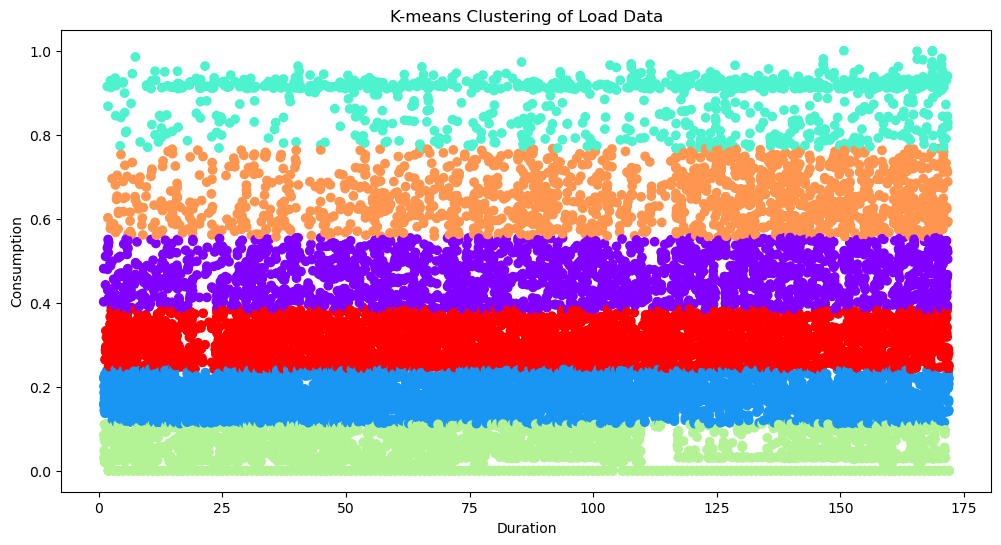

Period with Highest Load:
         ID  Duration  Consumption  cluster
2      1002      1.05     0.158161        1
4      1002      1.09     0.186071        1
6      1002      1.13     0.143541        1
9      1002      1.19     0.171451        1
11     1002      1.23     0.175439        1
...     ...       ...          ...      ...
17093  1003    171.87     0.168565        1
17094  1003    171.89     0.164497        1
17095  1003    171.91     0.221460        1
17096  1003    171.93     0.206929        1
17097  1003    171.95     0.218554        1

[5455 rows x 4 columns]
Silhouette Score: 0.5694039272623488


In [164]:
num_clusters = 6  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Consumption']])

# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['Duration'], df['Consumption'], c=df['cluster'], cmap='rainbow')
plt.title('K-means Clustering of Load Data')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.show()

# Interpret the clusters
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# for i, center in enumerate(cluster_centers):
#     print(f'Cluster {i + 1} - Center: {center}')

# Identify periods with the highest load
highest_load_cluster = df[df['cluster'] == df['cluster'].value_counts().idxmax()]
print("Period with Highest Load:")
print(highest_load_cluster)

silhouette_avg = silhouette_score(df[['Consumption']],df['cluster'] )
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\2584510439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\2584510439.py:10:

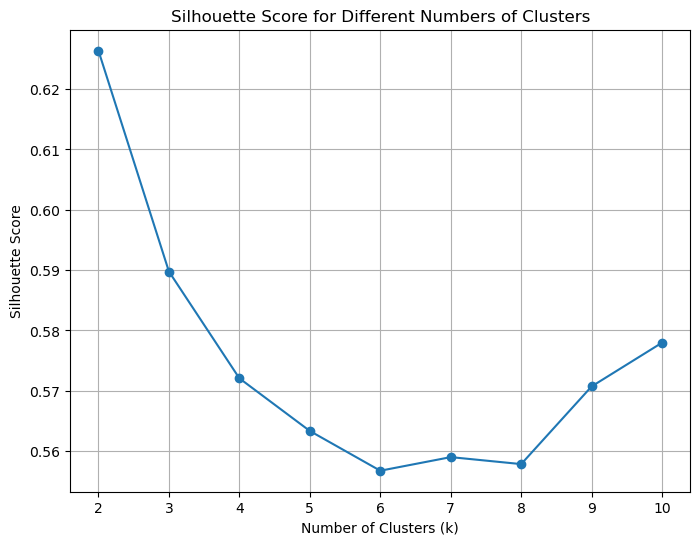

In [153]:
silhouette_scores = []

# Specify a range of cluster numbers (k)
min_clusters = 2
max_clusters = 10

for k in range(min_clusters, max_clusters + 1):
    # Apply K-means clustering for the current k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['cluster'] = kmeans.fit_predict(df)

    # Calculate the Silhouette Score for this k
    silhouette_avg = silhouette_score(df, df['cluster'])
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

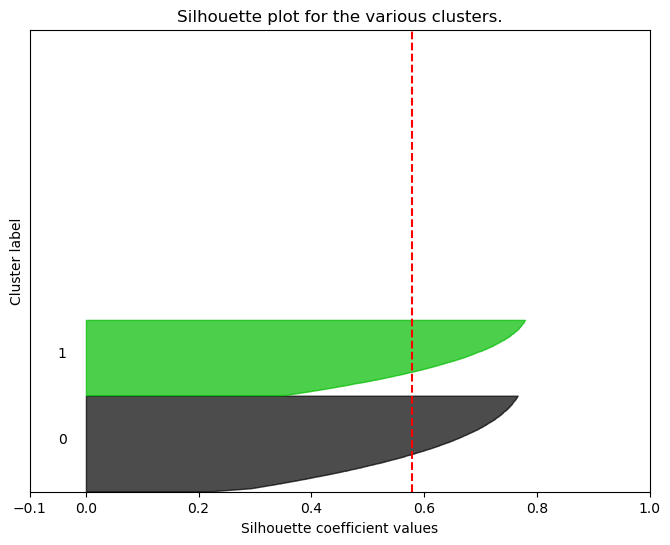

In [163]:
# Compute the silhouette scores for each sample
cluster_labels = df['cluster'] 
silhouette_avg = silhouette_score(df, cluster_labels)
sample_silhouette_values = silhouette_samples(df, cluster_labels)
n_clusters = 2
# Create a silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the y-axis labels
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Optimal number of clusters (K): 2


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Length of values (8550) does not match length of index (17100)

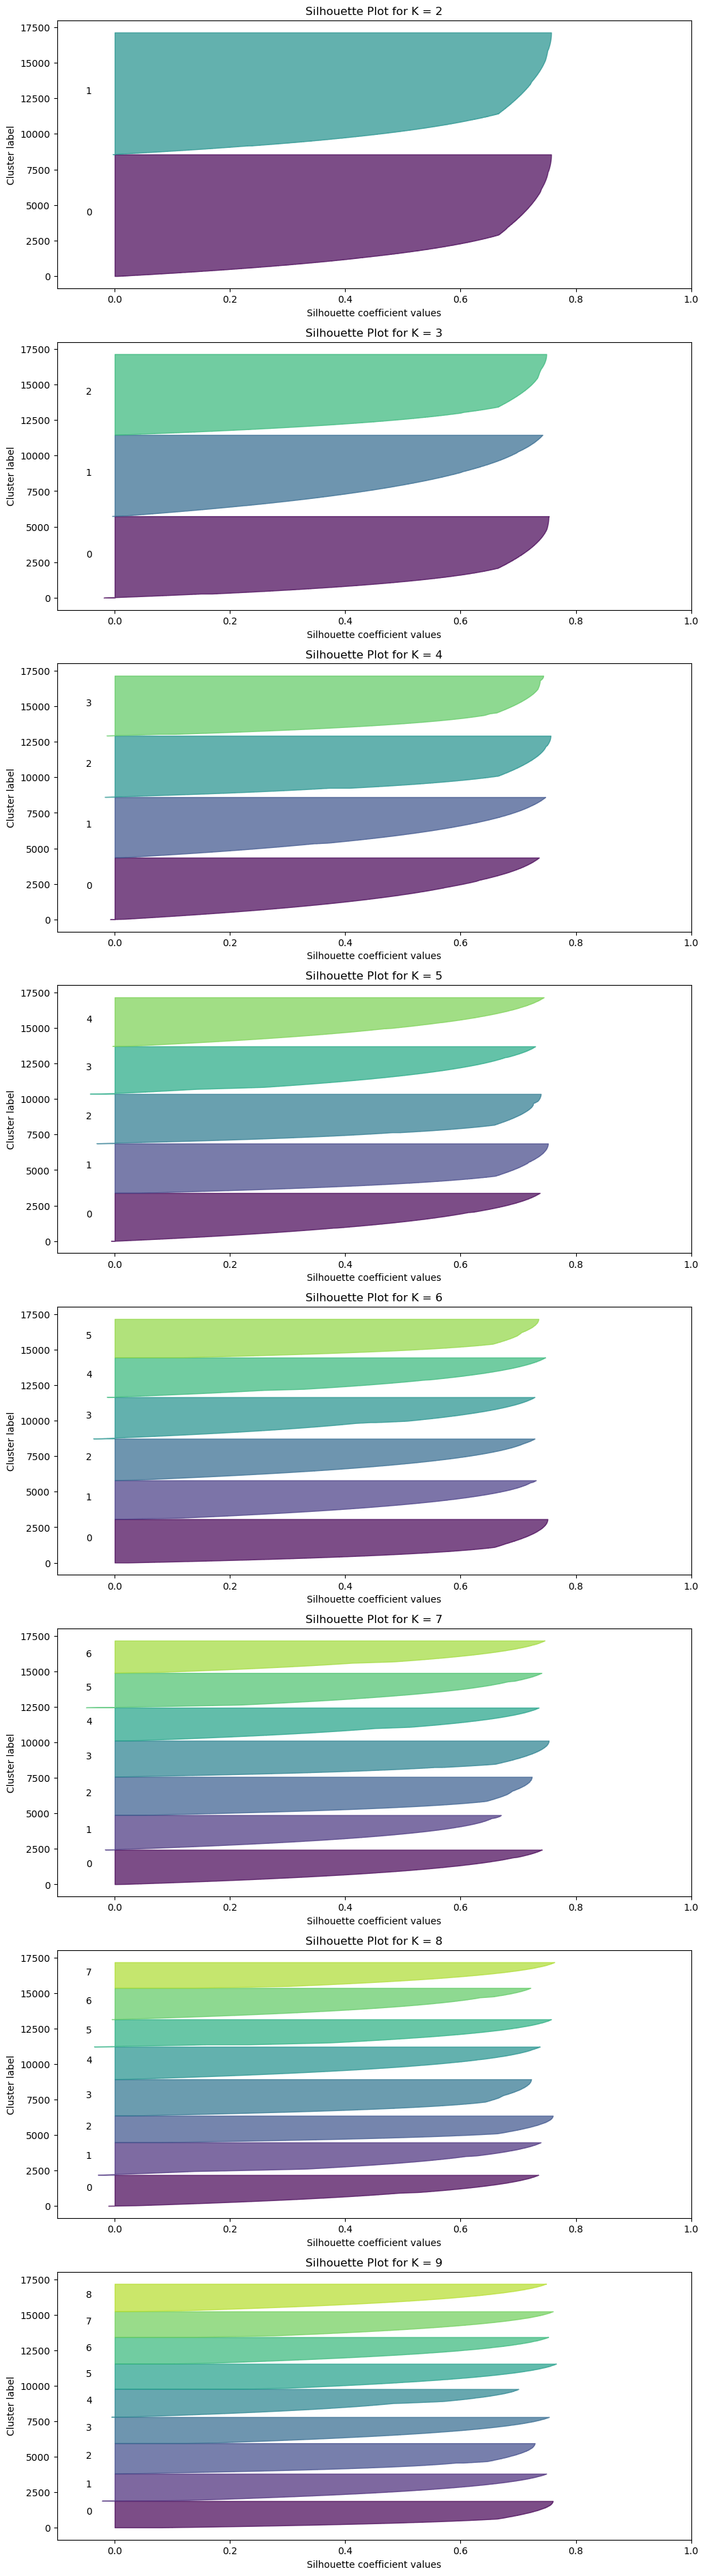

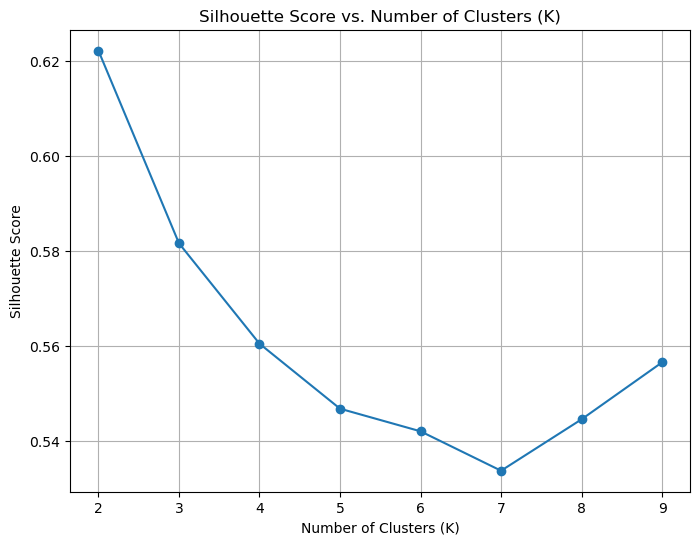

In [161]:
# Define a range of k values to test
k_values = range(2, 10)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Create subplots for each k value
plt.figure(figsize=(12, 6 * len(k_values)))

for plot_index, k in enumerate(k_values, 1):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate silhouette samples for each data point
    silhouette_vals = silhouette_samples(df, cluster_labels)

    # Sort the silhouette samples within each cluster
    silhouette_vals_sorted = [silhouette_vals[cluster_labels == i] for i in range(k)]

    # Create a subplot for the current k value
    plt.subplot(len(k_values), 1, plot_index)
    plt.xlim([-0.1, 1])

    # Plot silhouette samples for each cluster
    y_lower = 10
    for i in range(k):
        ith_silhouette_vals = silhouette_vals_sorted[i]
        ith_silhouette_vals.sort()
        size_cluster_i = ith_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with the cluster number at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    plt.title(f"Silhouette Plot for K = {k}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Find the optimal K based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(data)

# Plot the clustered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time', y='consumption', hue='cluster', palette='viridis', legend='full')
plt.title(f"Clustered Data (K = {optimal_k} Clusters)")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.show()
